# User Votes Generated via Bradley-Terry

In [1]:
from utils import create_polynomial, compute_borda, full_rank_aggregation
from classes import Voter
from visualize import ranking_text, plot_ranking
import random

## Trial: Only One Utility Function

In [2]:
import numpy as np
NUM_VOTERS = 50
CANDIDATES = np.arange(0, 25)
NUM_CANDIDATES = len(CANDIDATES)

voters = []
for _ in range(NUM_VOTERS):
    # coefficients = [random.uniform(-10, 10) for _ in range(3)]
    # coefficients = [0, 1]
    # ut_func = lambda x: create_polynomial(coefficients)(x) % 1
    variable = random.uniform(-1, 1)
    ut_func = lambda x: 0.5 + 0.5 * np.sin((x + variable) * np.pi / NUM_CANDIDATES)
    voters.append(Voter(ut_func))

In [3]:
full_ranks = []
for voter in voters:
    full_rank = voter.get_rank(CANDIDATES)
    full_ranks.append(full_rank)

full_rank_aggregated = full_rank_aggregation(full_ranks)

In [4]:
full_rank_aggregated

{12: 1200,
 11: 1150,
 13: 1100,
 10: 1050,
 14: 1000,
 9: 950,
 15: 900,
 8: 850,
 16: 800,
 7: 750,
 17: 700,
 6: 650,
 18: 600,
 5: 550,
 19: 500,
 4: 450,
 20: 400,
 3: 350,
 21: 300,
 2: 250,
 22: 200,
 1: 150,
 23: 100,
 0: 50,
 24: 0}

In [5]:
NUM_SAMPLES = 2 * NUM_CANDIDATES * (NUM_CANDIDATES - 1)

comparisons = []
for _ in range(NUM_SAMPLES):
    voter = random.choice(voters)
    c1, c2 = np.random.choice(CANDIDATES, size=2, replace=False)
    preference = voter.get_bt_preference(c1, c2, beta=1.0)
    comparisons.append(preference)

borda_aggregated = compute_borda(comparisons)

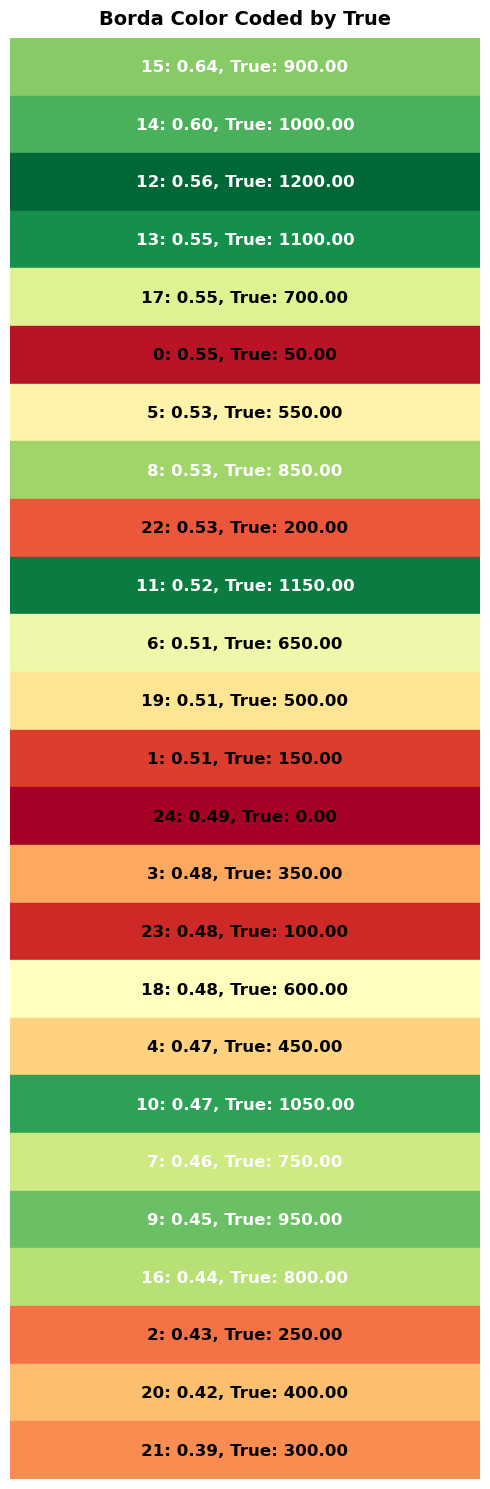

In [6]:
from visualize import plot_borda_ranking


plot_borda_ranking(borda_aggregated, full_rank_aggregated)

## Monotonically Decreasing Weights

In [7]:
sorted(borda_aggregated.keys(), key=lambda x: borda_aggregated[x], reverse=True)

[15,
 14,
 12,
 13,
 17,
 0,
 5,
 8,
 22,
 11,
 6,
 19,
 1,
 24,
 3,
 23,
 18,
 4,
 10,
 7,
 9,
 16,
 2,
 20,
 21]

In [8]:
from utils import avg_society_utility
w = np.arange(NUM_CANDIDATES, 0, -1)


V_society = avg_society_utility(borda_aggregated, w, voters)

In [9]:
print("Society Utility under Borda:", V_society)

Society Utility under Borda: 0.8402449016285197


In [10]:
V_star_society = avg_society_utility(full_rank_aggregated, w, voters)
print("Society Utility under Full Ranking:", V_star_society)

Society Utility under Full Ranking: 0.9017044956535245


In [11]:
distortion = V_star_society / V_society
print("Distortion of Borda:", distortion)

Distortion of Borda: 1.073144858012095


## Geometric Weights

In [12]:
w = np.array([NUM_CANDIDATES * 0.5**i for i in range(NUM_CANDIDATES)])
V_society = avg_society_utility(borda_aggregated, w, voters)
print("Society Utility under Borda with Geometric Weights:", V_society)
V_star_society = avg_society_utility(full_rank_aggregated, w, voters)
print("Society Utility under Full Ranking with Geometric Weights:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Borda with Geometric Weights:", distortion)

Society Utility under Borda with Geometric Weights: 0.9571086538566028
Society Utility under Full Ranking with Geometric Weights: 0.9955905653319379
Distortion of Borda with Geometric Weights: 1.0402064189058107


## Iterative Borda Winner Selection

In [13]:
# winner = np.array(list(borda_aggregated.values())).argmax()

In [14]:
from utils import pop_winner

curr_comparisons = comparisons.copy()
ranking = { candidate : 0 for candidate in CANDIDATES }
for i in range(NUM_CANDIDATES):
    curr_borda_winner = compute_borda(curr_comparisons, winner_only=True)
    ranking[list(curr_borda_winner.keys())[0]] = NUM_CANDIDATES - 1 - i
    curr_comparisons = pop_winner(curr_comparisons, list(curr_borda_winner.keys())[0])

    if len(curr_comparisons) == 0:
        break

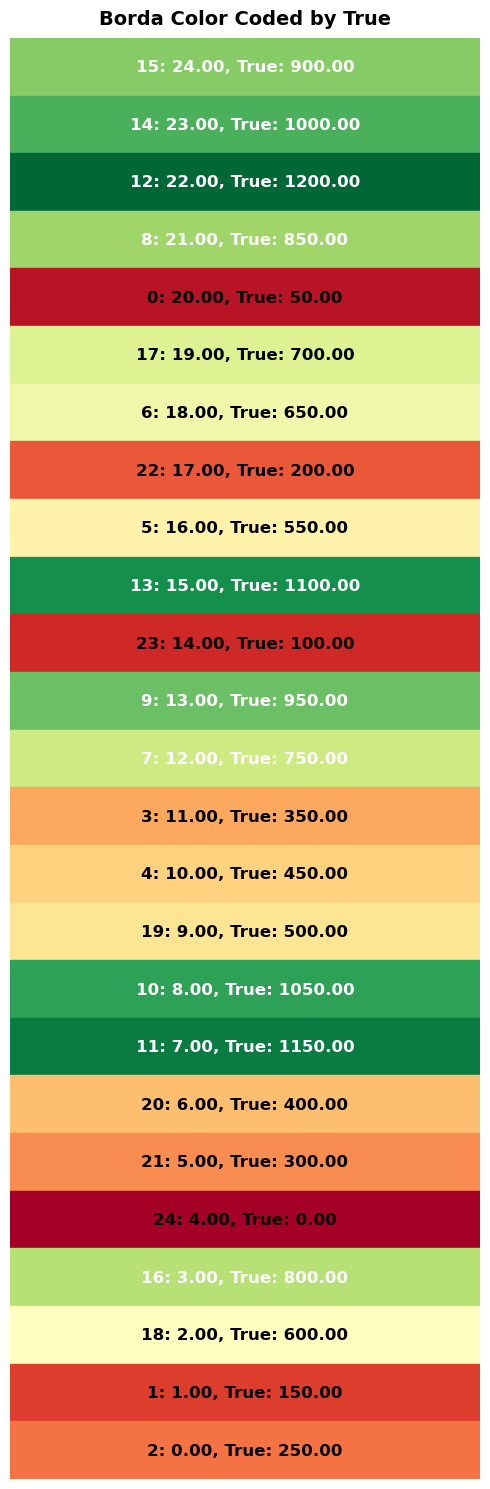

In [15]:
plot_borda_ranking(ranking, full_rank_aggregated)

In [16]:
w = np.arange(NUM_CANDIDATES, 0, -1)

V_society = avg_society_utility(ranking, w, voters)
print("Society Utility under Iterative Borda:", V_society)
V_star_society = avg_society_utility(full_rank_aggregated, w, voters)
print("Society Utility under Full Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Iterative Borda:", distortion)

Society Utility under Iterative Borda: 0.8474384504596668
Society Utility under Full Ranking: 0.9017044956535245
Distortion of Iterative Borda: 1.064035382350686


In [17]:
# w = np.arange(NUM_CANDIDATES, 0, -1)
w = np.array([NUM_CANDIDATES * 0.5**i for i in range(NUM_CANDIDATES)])

V_society = avg_society_utility(ranking, w, voters)
print("Society Utility under Iterative Borda:", V_society)
V_star_society = avg_society_utility(full_rank_aggregated, w, voters)
print("Society Utility under Full Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Iterative Borda:", distortion)

Society Utility under Iterative Borda: 0.9489720503931567
Society Utility under Full Ranking: 0.9955905653319379
Distortion of Iterative Borda: 1.049125277103227


## Using the Average Utility as Ground Truth

In [18]:
from utils import avg_candidate_utility


avg_utility_ranking = {candidate : avg_candidate_utility(candidate, voters) for candidate in CANDIDATES}

In [19]:
sorted(avg_utility_ranking.keys(), key=lambda x: avg_utility_ranking[x], reverse=True)

[12,
 11,
 13,
 10,
 14,
 9,
 15,
 8,
 16,
 7,
 17,
 6,
 18,
 5,
 19,
 4,
 20,
 3,
 21,
 2,
 22,
 1,
 23,
 0,
 24]

In [20]:
sorted(full_rank_aggregated.keys(), key=lambda x: full_rank_aggregated[x], reverse=True)

[12,
 11,
 13,
 10,
 14,
 9,
 15,
 8,
 16,
 7,
 17,
 6,
 18,
 5,
 19,
 4,
 20,
 3,
 21,
 2,
 22,
 1,
 23,
 0,
 24]

## Re-calculating Distortion

In [39]:
w = np.arange(NUM_CANDIDATES, 0, -1)

V_society = avg_society_utility(borda_aggregated, w, voters)
print("Society Utility under Iterative Borda:", V_society)
V_star_society = avg_society_utility(avg_utility_ranking, w, voters)
print("Society Utility under Average Utility Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Raw Borda:", distortion)

Society Utility under Iterative Borda: 0.8402449016285197
Society Utility under Average Utility Ranking: 0.9017044956535245
Distortion of Raw Borda: 1.073144858012095


In [40]:
w = np.array([NUM_CANDIDATES * 0.5**i for i in range(NUM_CANDIDATES)])

V_society = avg_society_utility(borda_aggregated, w, voters)
print("Society Utility under Raw Borda:", V_society)
V_star_society = avg_society_utility(avg_utility_ranking, w, voters)
print("Society Utility under Average Utility Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Raw Borda:", distortion)

Society Utility under Raw Borda: 0.9571086538566028
Society Utility under Average Utility Ranking: 0.9955905653319379
Distortion of Raw Borda: 1.0402064189058107


In [41]:
w = np.arange(NUM_CANDIDATES, 0, -1)

V_society = avg_society_utility(ranking, w, voters)
print("Society Utility under Iterative Borda:", V_society)
V_star_society = avg_society_utility(avg_utility_ranking, w, voters)
print("Society Utility under Average Utility Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Iterative Borda:", distortion)

Society Utility under Iterative Borda: 0.8474384504596668
Society Utility under Average Utility Ranking: 0.9017044956535245
Distortion of Iterative Borda: 1.064035382350686


In [43]:
w = np.array([NUM_CANDIDATES * 0.5**i for i in range(NUM_CANDIDATES)])

V_society = avg_society_utility(ranking, w, voters)
print("Society Utility under Iterative Borda:", V_society)
V_star_society = avg_society_utility(avg_utility_ranking, w, voters)
print("Society Utility under Average Utility Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Iterative Borda:", distortion)

Society Utility under Iterative Borda: 0.9489720503931567
Society Utility under Average Utility Ranking: 0.9955905653319379
Distortion of Iterative Borda: 1.049125277103227


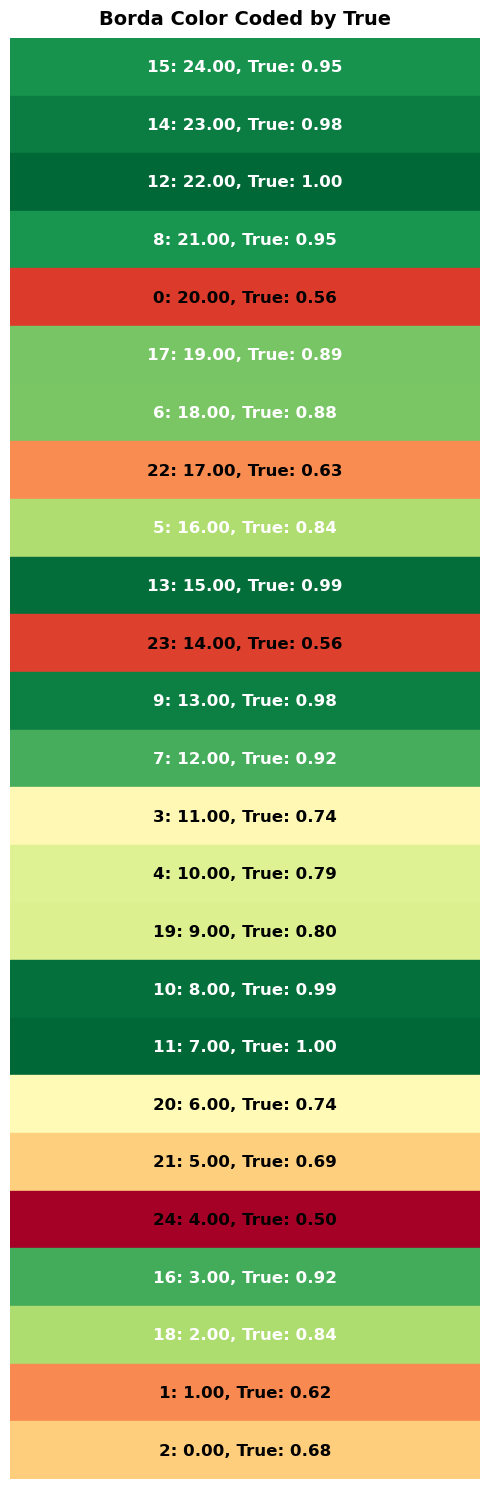

In [44]:
plot_borda_ranking(ranking, avg_utility_ranking)

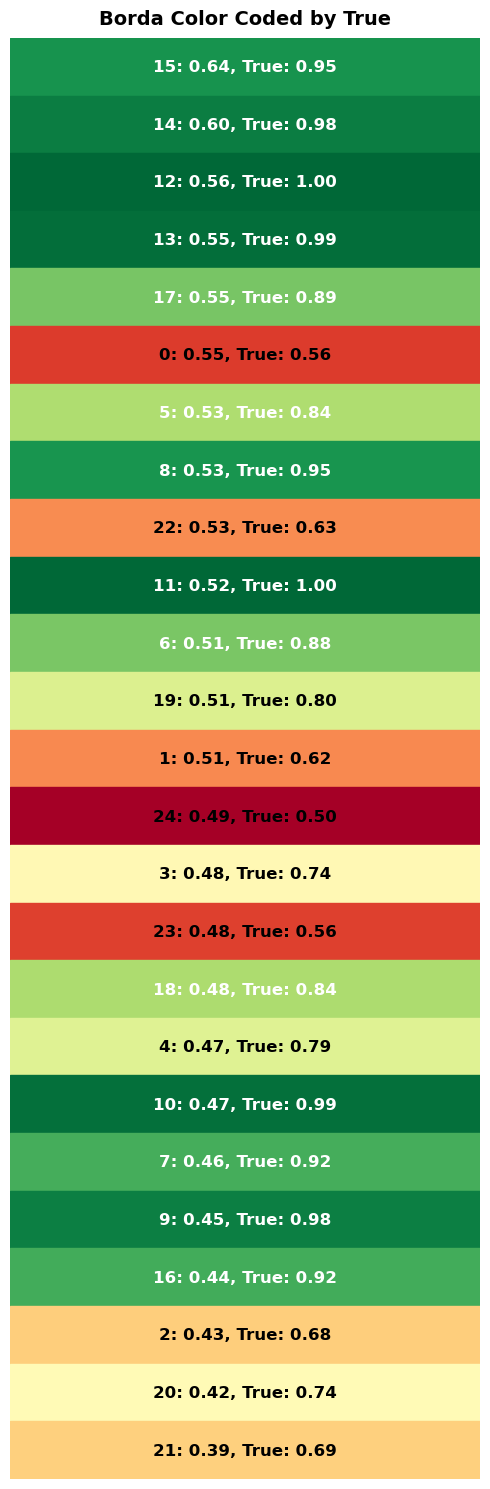

In [45]:
plot_borda_ranking(borda_aggregated, avg_utility_ranking)

## Hopefully More Sufficient Round of Samples

In [47]:
NUM_SAMPLES = NUM_CANDIDATES * NUM_CANDIDATES * (NUM_CANDIDATES - 1)

comparisons = []
for _ in range(NUM_SAMPLES):
    voter = random.choice(voters)
    c1, c2 = np.random.choice(CANDIDATES, size=2, replace=False)
    preference = voter.get_bt_preference(c1, c2, beta=1.0)
    comparisons.append(preference)

borda_aggregated = compute_borda(comparisons)

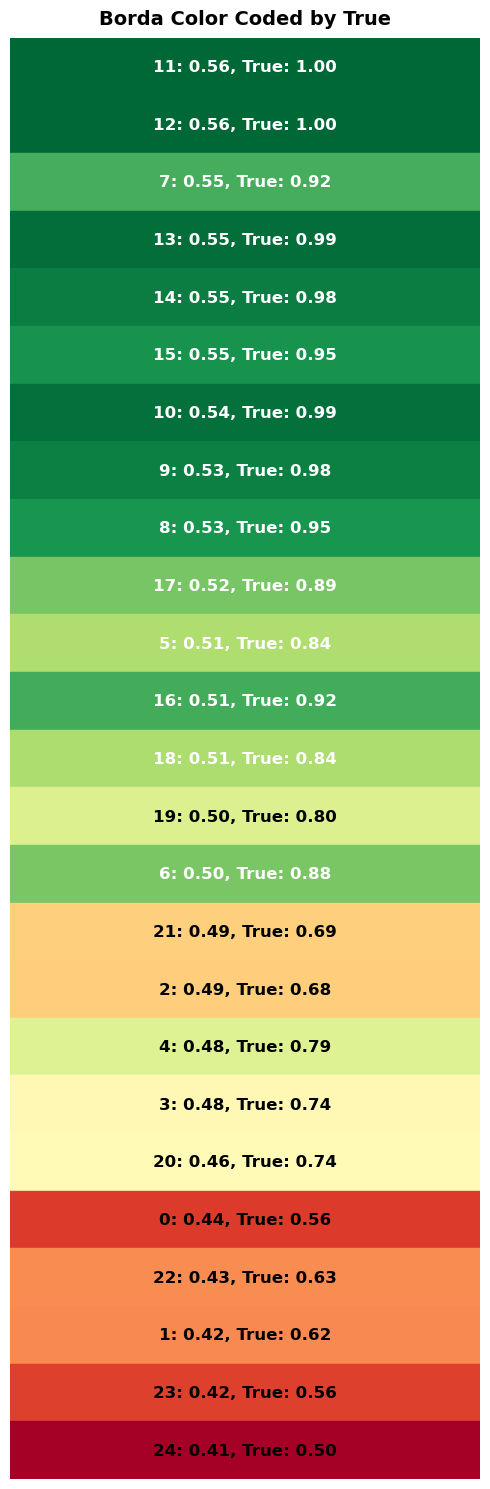

In [48]:
plot_borda_ranking(borda_aggregated, avg_utility_ranking)

In [50]:
# w = np.array([NUM_CANDIDATES * 0.5**i for i in range(NUM_CANDIDATES)])
w = np.arange(NUM_CANDIDATES, 0, -1)

V_society = avg_society_utility(borda_aggregated, w, voters)
print("Society Utility under Raw Borda:", V_society)
V_star_society = avg_society_utility(avg_utility_ranking, w, voters)
print("Society Utility under Average Utility Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Raw Borda:", distortion)

Society Utility under Raw Borda: 0.8978366156345697
Society Utility under Average Utility Ranking: 0.9017044956535245
Distortion of Raw Borda: 1.00430799986501


In [49]:
w = np.array([NUM_CANDIDATES * 0.5**i for i in range(NUM_CANDIDATES)])

V_society = avg_society_utility(borda_aggregated, w, voters)
print("Society Utility under Raw Borda:", V_society)
V_star_society = avg_society_utility(avg_utility_ranking, w, voters)
print("Society Utility under Average Utility Ranking:", V_star_society)
distortion = V_star_society / V_society
print("Distortion of Raw Borda:", distortion)

Society Utility under Raw Borda: 0.9868683145759921
Society Utility under Average Utility Ranking: 0.9955905653319379
Distortion of Raw Borda: 1.0088383126979745


## Trial: Different Weights?

In [25]:
# import numpy as np
# NUM_VOTERS = 50
# CANDIDATES = np.arange(0, 25)
# NUM_CANDIDATES = len(CANDIDATES)
# # 
# voters = []
# for _ in range(NUM_VOTERS):
#     coefficients = [random.uniform(-10, 10) for _ in range(3)]
#     # coefficients = [0, 1]
#     ut_func = create_polynomial(coefficients)
#     voters.append(Voter(ut_func))

In [26]:
# full_ranks = []
# for voter in voters:
#     full_rank = voter.get_rank(CANDIDATES)
#     full_ranks.append(full_rank)
# full_rank_aggregated = full_rank_aggregation(full_ranks)

In [27]:
# NUM_SAMPLES = NUM_CANDIDATES ** 2 * NUM_CANDIDATES * (NUM_CANDIDATES - 1)

# comparisons = []
# for _ in range(NUM_SAMPLES):
#     voter = random.choice(voters)
#     c1, c2 = np.random.choice(CANDIDATES, size=2, replace=False)
#     preference = voter.get_bt_preference(c1, c2, beta=1.0)
#     comparisons.append(preference)

# borda_aggregated = compute_borda(comparisons)